In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

file_path = "/content/drive/MyDrive/IS733/Assignments/Assignment1/Baltimore911.csv"

df = pd.read_csv(file_path,low_memory=False)


In [3]:
from skimpy import skim

# Generate a summary report
report = skim(df)


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 292761 │ │ string      │ 12    │                                                          │
│ │ Number of columns │ 16     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA       ┃ NA %   ┃ mean   ┃ sd      ┃ p0    ┃ p25  ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Longitude            │     1635 │   0.56 │    -77 │   0.044 │   -82 │  -77 │  -77 │  -77 │   -76 │      ▇  │  │
│ │ Latitude             │     1635 │   0.56 │     39 │    0.03 │    38 │   39 │   39 │   39 │    40 │     ▇▅  │  │
│ │ Location 1           │   292761 │    100 │    nan │     nan │   nan │  nan │  nan │  nan │   nan │         │  │
│ │ Total Incidents      │        0 │      0 │      1 │       0 │     1 │    1 │    1 │    1 │     1 │     ▇   │  │
│ └──────────────────────┴──────────┴────────┴────────┴─────────┴───────┴──────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                 ┃ NA           ┃ NA %        ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CrimeDate                   │            0 │           0 │                        1 │               292761 │  │
│ │ CrimeTime                   │           26 │        0.01 │                        1 │               292735 │  │
│ │ CrimeCode                   │            0 │           0 │                        1 │               292761 │  │
│ │ Location                    │         1336 │        0.46 │                      3.4 │              1000942 │  │
│ │ Description                 │            0 │           0 │                      1.8 │               539328 │  │
│ │ Inside/Outside              │        33760 │       11.53 │                     0.88 │               259001 │  │
│ │ Weapon                      │       231229 │       78.98 │                     0.21 │                61532 │  │
│ │ Post                        │         2376 │        0.81 │                     0.99 │               290385 │  │
│ │ District                    │            0 │           0 │                        1 │               292761 │  │
│ │ Neighborhood                │        10504 │        3.59 │                      1.6 │               461736 │  │
│ │ Premise                     │        34012 │       11.62 │                      1.3 │               367241 │  │
│ │ vri_name1                   │       258177 │       88.19 │                     0.15 │                42654 │  │
│ └─────────────────────────────┴──────────────┴────────

In [5]:
import pandas as pd
from tabulate import tabulate
from pandas.api.types import CategoricalDtype

# Create a list to store table rows
table_rows = []

# Iterate through columns and append information to the table rows
for col in df.columns:
    if isinstance(df[col].dtype, CategoricalDtype) or pd.api.types.is_object_dtype(df[col]):
        total_unique_values = df[col].nunique()
        top_categories = df[col].value_counts().head(3)

        # Append information to the table rows
        table_rows.append([col, total_unique_values, top_categories.to_dict()])

# Print the table
print(tabulate(table_rows, headers=['Column', 'Total Unique Values', 'Top 3 Categories'], tablefmt='pretty'))



+----------------+---------------------+-------------------------------------------------------------------------------+
|     Column     | Total Unique Values |                               Top 3 Categories                                |
+----------------+---------------------+-------------------------------------------------------------------------------+
|   CrimeDate    |        2300         |           {'04/27/2015': 421, '06/05/2016': 255, '12/20/2018': 212}           |
|   CrimeTime    |        1475         |            {'18:00:00': 6772, '17:00:00': 6463, '12:00:00': 6037}             |
|   CrimeCode    |         81          |                    {'4E': 48061, '6D': 38977, '5A': 25351}                    |
|    Location    |        27064        |  {'1500 RUSSELL ST': 847, '3500 BOSTON ST': 708, '2400 FREDERICK AVE': 558}   |
|  Description   |         14          |        {'LARCENY': 65508, 'COMMON ASSAULT': 48061, 'BURGLARY': 42237}         |
| Inside/Outside |          4   

In [6]:
df = df.drop(columns=['Location 1'])


In [7]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path,low_memory=False)

# Calculate the percentage of missing values for each row
missing_percentage = df.isnull().mean(axis=1) * 100

# Calculate the overall percentage of missing values in the entire DataFrame
overall_missing_percentage = missing_percentage.mean()

print(f"Overall missingness: {overall_missing_percentage:.2f}%")


Overall missingness: 18.52%


In [8]:
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)


In [9]:
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

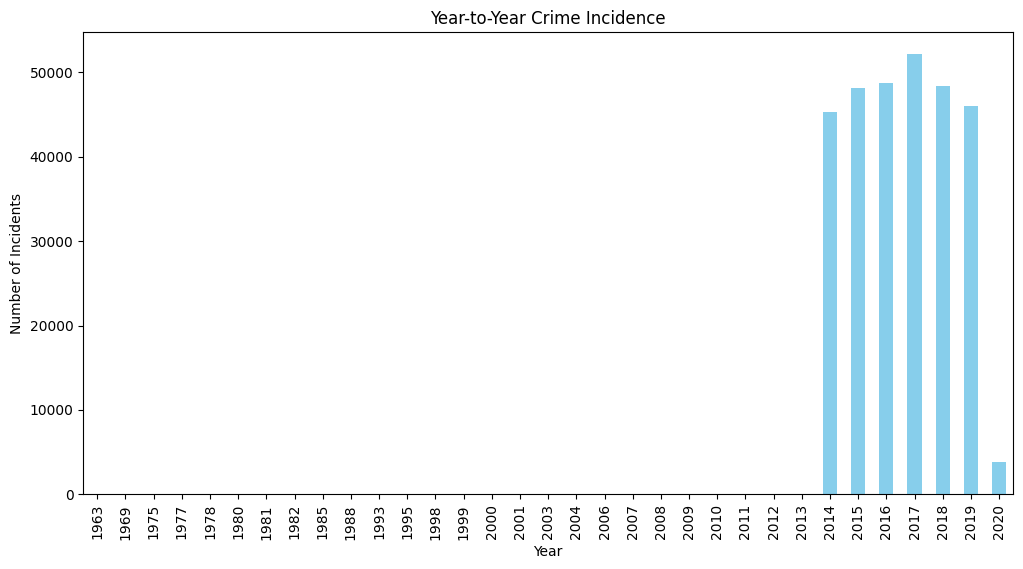

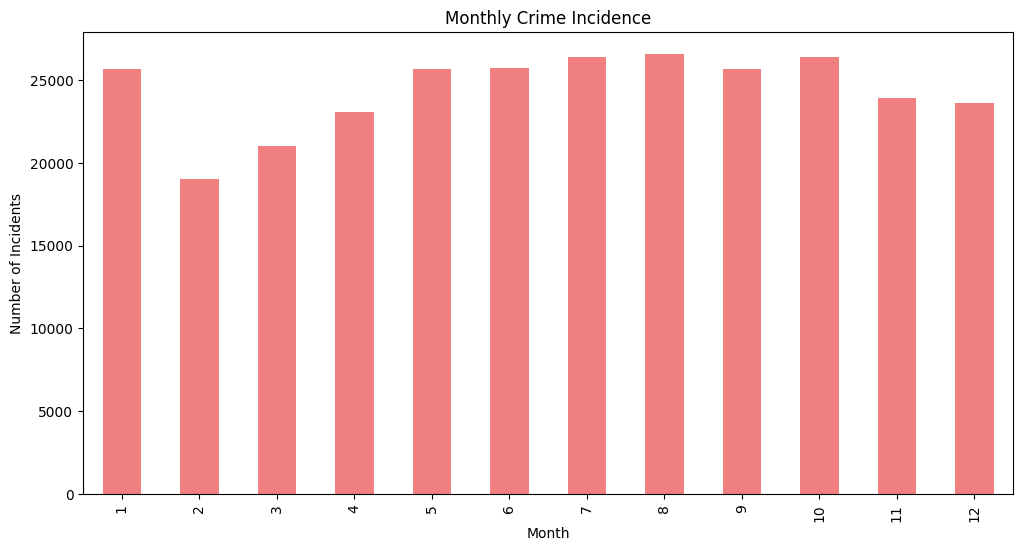

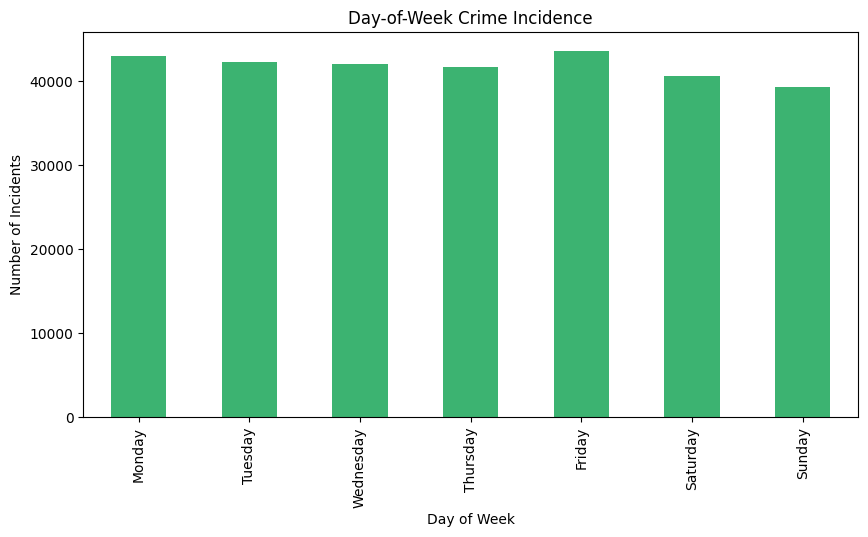

In [10]:
import matplotlib.pyplot as plt

df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract year, month, and day-of-week information
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.dayofweek  # Monday=0, Sunday=6

# Aggregating overall crime incidence by year, month, and day-of-week
yearly_crime = df.groupby('Year').size()
monthly_crime = df.groupby('Month').size()
day_of_week_crime = df.groupby('DayOfWeek').size()

# Plotting year-to-year crime incidence
plt.figure(figsize=(12, 6))
yearly_crime.plot(kind='bar', color='skyblue')
plt.title('Year-to-Year Crime Incidence')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

# Plotting monthly crime incidence
plt.figure(figsize=(12, 6))
monthly_crime.plot(kind='bar', color='lightcoral')
plt.title('Monthly Crime Incidence')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.show()

# Plotting day-of-week crime incidence
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_crime.index = day_order
plt.figure(figsize=(10, 5))
day_of_week_crime.plot(kind='bar', color='mediumseagreen')
plt.title('Day-of-Week Crime Incidence')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.show()

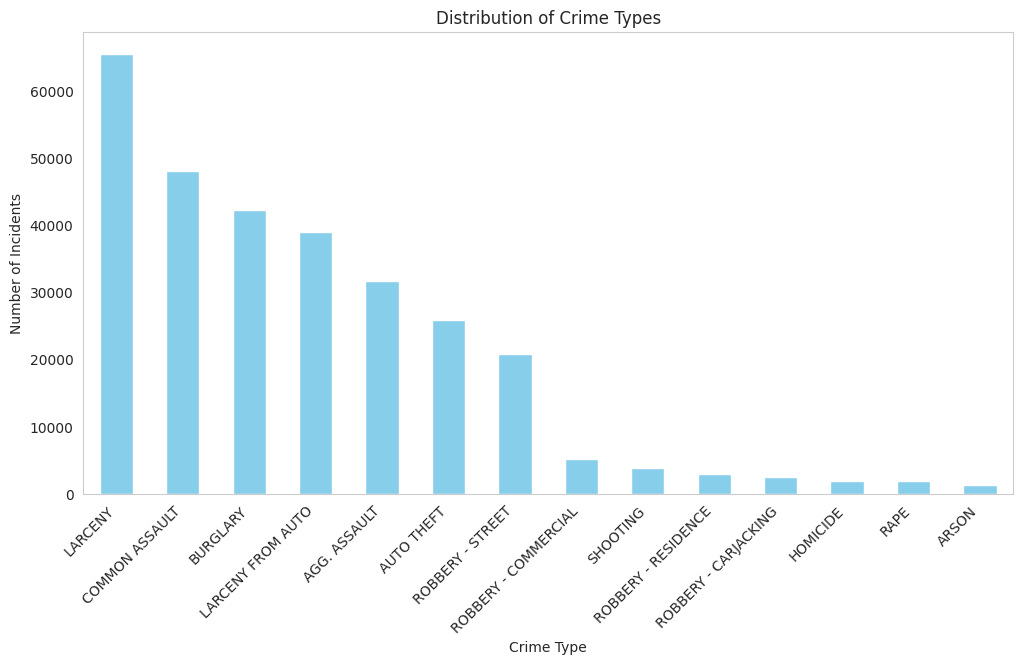

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

crime_description_distribution = df['Description'].value_counts()

# Set Seaborn style without grid
sns.set_style("whitegrid", {'axes.grid': False})

# Plotting the distribution
plt.figure(figsize=(12, 6))
crime_description_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()


/tmp/ipykernel_915/1935117588.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1963-1999' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[(df['Year'] >= 1963) & (df['Year'] <= 1999), 'Years'] = '1963-1999'
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

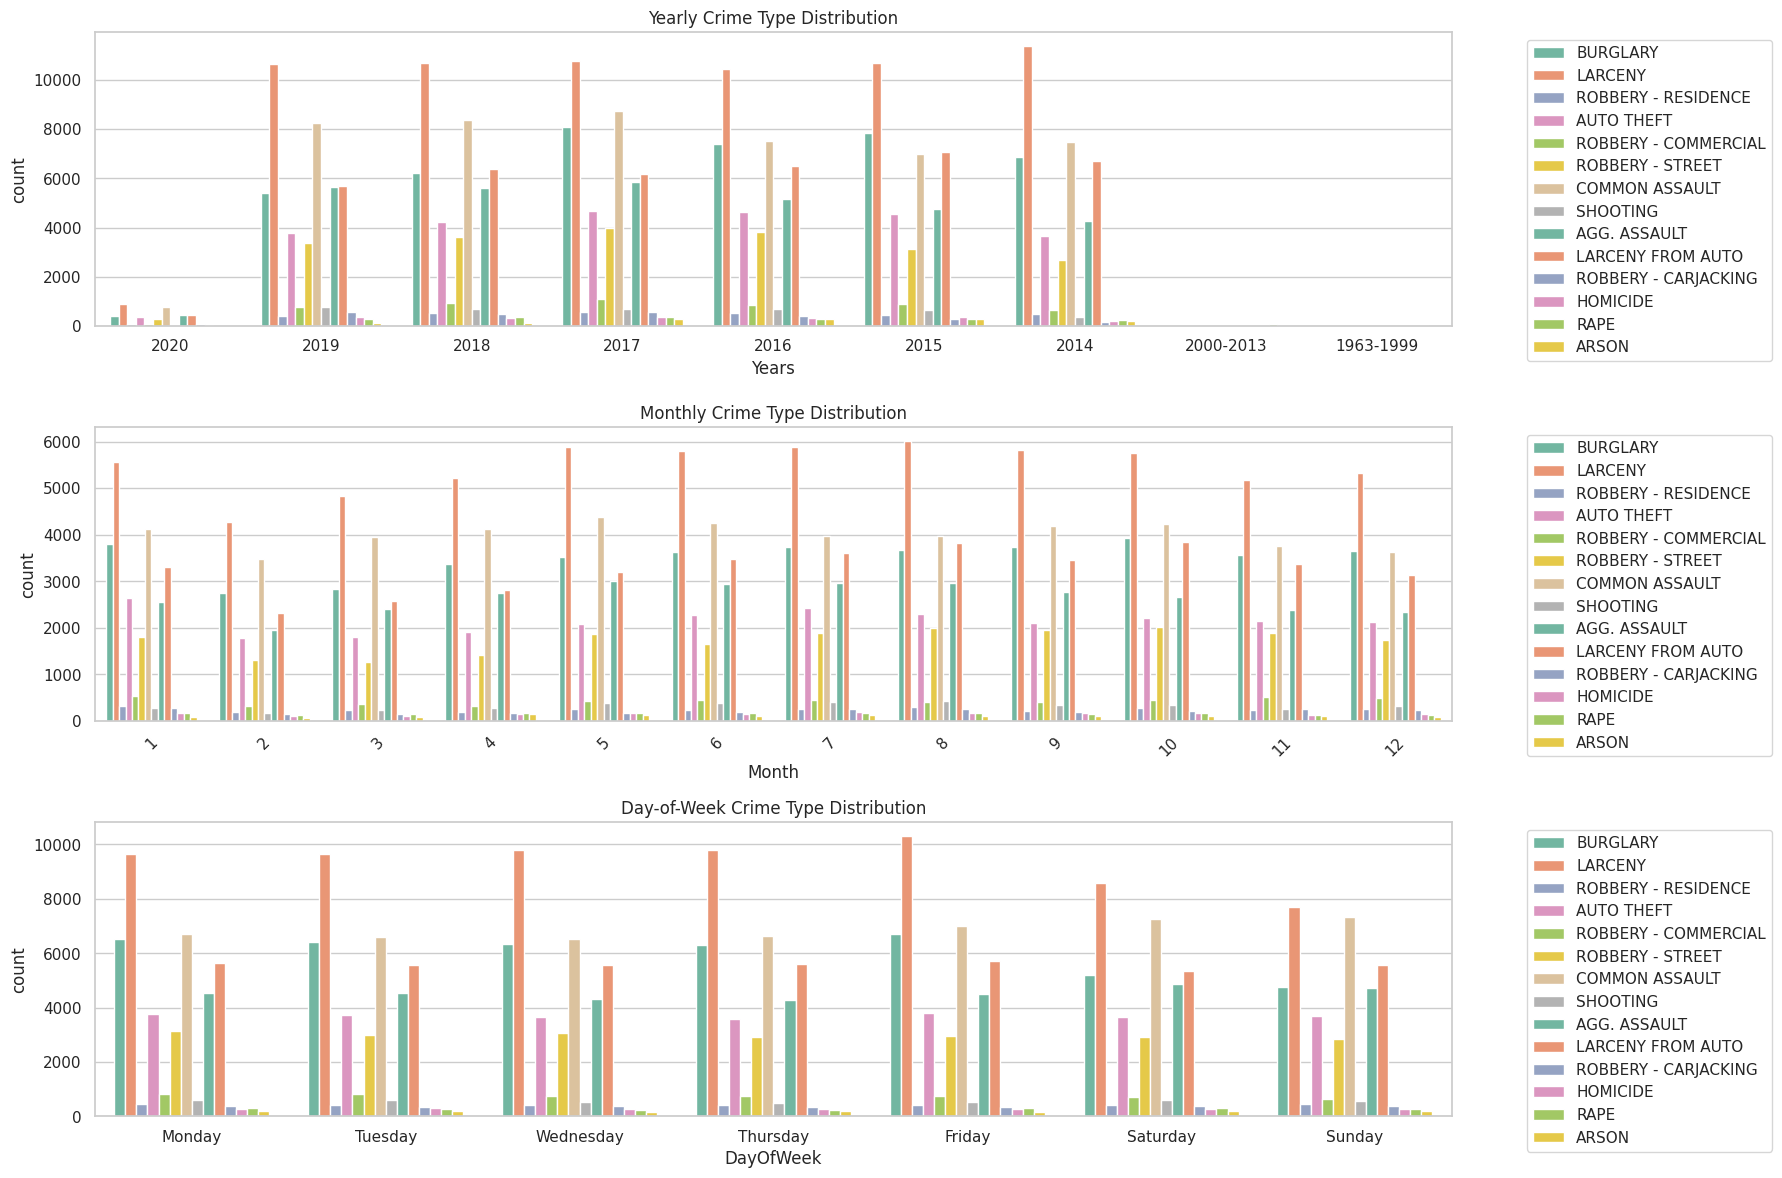

In [12]:
# Convert 'CrimeDate' to datetime format
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract year, month, and day-of-week information
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.day_name()

# Set up a more spacious plotting layout
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")

# Use Seaborn's color palette
color_palette = "Set2"

df['Years'] = df['Year']
df.loc[(df['Year'] >= 1963) & (df['Year'] <= 1999), 'Years'] = '1963-1999'
df.loc[(df['Year'] >= 2000) & (df['Year'] <= 2013), 'Years'] = '2000-2013'


# Plot 1: Yearly Crime Type Distribution
plt.subplot(3, 1, 1)
sns.countplot(x='Years', hue='Description', data=df, palette=color_palette)
plt.title('Yearly Crime Type Distribution')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend placement

# Plot 2: Monthly Crime Type Distribution
plt.subplot(3, 1, 2)
sns.countplot(x='Month', hue='Description', data=df, palette=color_palette)
plt.title('Monthly Crime Type Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend placement

# Plot 3: Day-of-Week Crime Type Distribution
plt.subplot(3, 1, 3)
sns.countplot(x='DayOfWeek', hue='Description', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=color_palette)
plt.title('Day-of-Week Crime Type Distribution')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend placement

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()